<a href="https://colab.research.google.com/github/Isi2000/NX/blob/main/NBA_GRAPHS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
from collections import defaultdict
import shutil
import os

In [63]:
!git clone https://github.com/Isi2000/NX.git

fatal: destination path 'NX' already exists and is not an empty directory.


In [64]:
df_MVP = pd.read_csv('/content/NX/MVP_2022_2023.txt', sep = '\t', skiprows=[0])
print(df_MVP['1st Place (10 points)'].unique())

['Embiid Joel (PHI)' 'Antetokounmpo Giannis (MIL)' 'Jokic Nikola (DEN)']


In [65]:
G = nx.Graph()
G.add_nodes_from(df_MVP['Voter'], bipartite = 0)
G.add_nodes_from(df_MVP['1st Place (10 points)'], bipartite = 1)

In [66]:
nominee_to_voters = {}

for idx, row in df_MVP.iterrows():
    voter_node = row['Voter']
    nominee_node = row['1st Place (10 points)']
    G.add_edge(voter_node, nominee_node)

    # Add the voter to the nominee's list in the dictionary
    if nominee_node not in nominee_to_voters:
        nominee_to_voters[nominee_node] = []
    nominee_to_voters[nominee_node].append(voter_node)

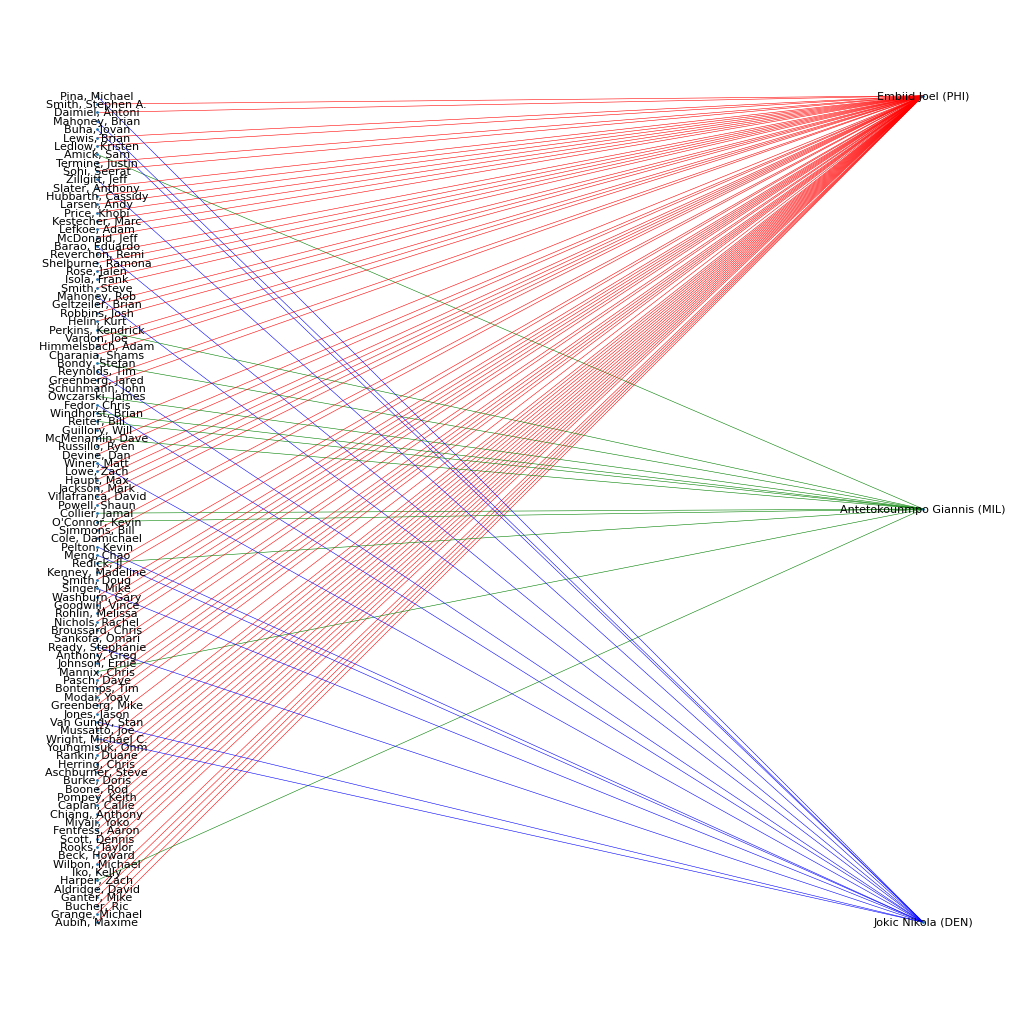

In [73]:
nominee_nodes = df_MVP['1st Place (10 points)'].unique()
colors = ['red', 'green', 'blue']  # You can specify your own colors for the three nodes

# Create a dictionary to map nominee nodes to colors
nominee_color_map = {nominee_nodes[i]: colors[i] for i in range(len(nominee_nodes))}
colors = [nominee_color_map[u[1]] for u in G.edges()]
# Draw the graph with colors
plt.figure(figsize=(10, 10))
pos1 = nx.bipartite_layout(G, df_MVP['Voter'])
nx.draw(G, pos1,  with_labels=True, font_size=8, node_size=1, edge_color=colors, width=0.4)
plt.show()

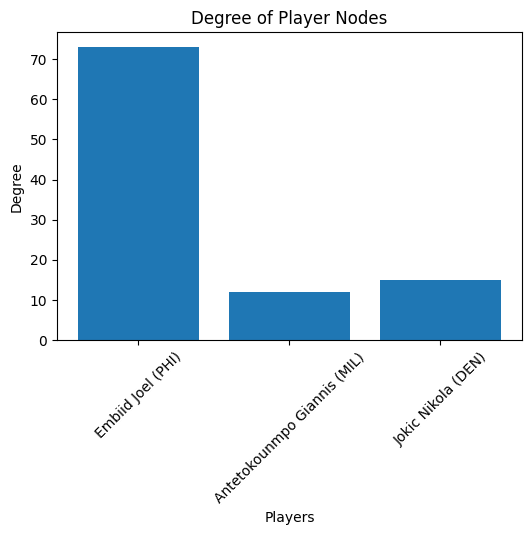

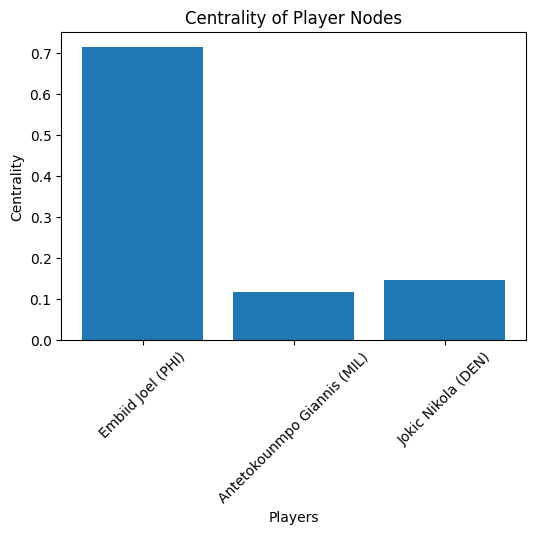

In [72]:
# Extract player nodes
player_nodes = df_MVP['1st Place (10 points)'].unique()

# Compute metrics for player nodes
player_degrees = {player: G.degree(player) for player in player_nodes}
player_centrality = nx.degree_centrality(G)

# Degree
plt.figure(figsize=(6, 4))
degrees = [player_degrees[player] for player in player_nodes]
plt.bar(player_nodes, degrees)
plt.title('Degree of Player Nodes')
plt.xlabel('Players')
plt.ylabel('Degree')
plt.xticks(rotation=45)
plt.show()

# Centrality
plt.figure(figsize=(6, 4))
centrality_values = [player_centrality[player] for player in player_nodes]
plt.bar(player_nodes, centrality_values)
plt.title('Centrality of Player Nodes')
plt.xlabel('Players')
plt.ylabel('Centrality')
plt.xticks(rotation=45)
plt.show()


In [ ]:
for idx, row in df_MVP.iterrows():
  voter_node = row['Voter']
  nominee_node = row['1st Place (10 points)']
  B.add_edge(voter_node, nominee_node)

In [ ]:
B = nx.Graph()

In [ ]:
B.add_nodes_from(df_MVP['Voter'], bipartite = 0)
for col_name in df_MVP.columns[2:]:
  B.add_nodes_from(df_MVP[col_name], bipartite = 1)
print(B)

In [ ]:
dumb_map = {1: 10, 2: 7, 3: 5, 4: 3, 5: 1} #becaus it is easier to extract weight from position
for idx, row in df_MVP.iterrows():
  voter_node = row['Voter']
  for col_name in df_MVP.columns[2:]:
    nominee_node = row[col_name]
    B.add_edge(voter_node, nominee_node, weight = dumb_map[int(col_name[0])])

In [ ]:
#gradient of blues
color_map = {10: '#336699', 7: '#5a92bd', 5: '#8bb0d0', 3: '#b3cde3', 1: '#dcecf9'}
color_edges = [color_map[B[u][v]['weight']] for u,v in B.edges()]
edge_weights = [(B[u][v]['weight']/10) for u,v in B.edges()]

In [ ]:
pos = nx.bipartite_layout(B, df_MVP['Voter'])
plt.figure(figsize=(8, 8)) #change the fisize when ready to plot well
nx.draw(B, pos,  with_labels=True, font_size=5, node_size=1, edge_color = color_edges, width = edge_weights)
plt.show()

In [ ]:
nx.is_bipartite(B)

# Network analysis

Before taking any deep consideration on the network we must first analyze the data according to the standard metrics to ge to get a better feeling

In [ ]:
# 1. Top players based on total weight
player_weights = defaultdict(int)
for u, v, data in B.edges(data=True):
    if B.nodes[u]['bipartite'] == 1:  # u is a player
        player_weights[u] += data['weight']
    else:
        player_weights[v] += data['weight']

sorted_players = sorted(player_weights.items(), key=lambda x: x[1], reverse=True)
print("Top players based on points:")
for player, weight in sorted_players[:10]:
    print(f"{player}: {weight} points")

In [ ]:
plt.hist(player_weights.values(), bins=50, alpha=0.75)
plt.title("Distribution of Total Points per Player")
plt.xlabel("Total Points")
plt.ylabel("Number of Players")
plt.show()

In [ ]:
positions = defaultdict(lambda: defaultdict(int))

for idx, row in df_MVP.iterrows():
    for col_idx, col_name in enumerate(df_MVP.columns[2:], 1):
        nominee_node = row[col_name]
        positions[nominee_node][col_idx] += 1

for player, pos_dict in positions.items():
    print(f"{player}: {pos_dict}")


In [ ]:
voters_degree = [d for n, d in B.degree() if B.nodes[n]['bipartite'] == 0]
players_degree = [d for n, d in B.degree() if B.nodes[n]['bipartite'] == 1]


plt.figure(figsize = (4, 4))
plt.hist(players_degree, alpha=0.5, label="Players", color = 'Blue')

plt.title("Degree distribution for Voter and Player nodes")
plt.legend()
plt.show()